In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
from math import exp
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ignore warning messages.
warnings.filterwarnings("ignore") 

# Read data from the csv file and convert it into a dataframe.
df = pd.read_csv('/Users/andrewzhou/Downloads/WQ 07-05-22 to 07-05-23, Consistent Units.csv')

df.head()

,Unnamed: 0,"CHLOROPHYLL A, CORRECTED FOR PHEOPHYTIN","CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN","DEPTH, SECCHI DISK DEPTH",DISSOLVED OXYGEN (DO),"NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)",PHOSPHORUS
0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,NaN,NaN,NaN,NaN,NaN,NaN
2,8/30/22 14:53,NaN,NaN,165.0,3769.565217,NaN,NaN
3,(blank),NaN,NaN,165.0,NaN,NaN,NaN
4,25.6377,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#look at the tail of the dataframe
df.tail()

In [33]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
#df['NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)'] = pd.to_numeric(df['NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)'], errors='coerce')
#df = df.replace(np.nan, 0, regex=True)
df.info()

In [ ]:
#df['CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN'] = pd.to_numeric(df['CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN'], errors='coerce')
#df = df.replace(np.nan, 0, regex=True)
#df.info

In [34]:
df=df.astype('float')
#df = df.replace(np.nan,0,regex=True)
df.dtypes


CHLOROPHYLL A, CORRECTED FOR PHEOPHYTIN                         float64
CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN                       float64
DEPTH, SECCHI DISK DEPTH                                        float64
DISSOLVED OXYGEN (DO)                                           float64
NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)    float64
PHOSPHORUS                                                      float64
dtype: object

In [ ]:
#df.plot(kind = 'scatter', y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN',ylim=(0,4000),xlim=(0,700))
#plt.show()

In [35]:
#Splitting into train and test sets
X=df.loc[:,df.columns != 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)']     
X.info()
Y=df['NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)']  
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30748 entries, 0 to 30747
Data columns (total 5 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   CHLOROPHYLL A, CORRECTED FOR PHEOPHYTIN    4080 non-null   float64
 1   CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN  4129 non-null   float64
 2   DEPTH, SECCHI DISK DEPTH                   12103 non-null  float64
 3   DISSOLVED OXYGEN (DO)                      10663 non-null  float64
 4   PHOSPHORUS                                 9996 non-null   float64
dtypes: float64(5)
memory usage: 1.2 MB


In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

In [ ]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train, Y_train)
train_accuracy = model.score(X_train, Y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test, Y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

model = RandomForestRegressor()


model.fit(X_train, Y_train)
train_accuracy = model.score(X_train, Y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test, Y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')



In [ ]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
important_features = pd.Series(data=model.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features)

New dataframe with only important features 

In [36]:
sdf = pd.DataFrame()
sdf['NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)'] = df['NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)']
sdf['PHOSPHORUS'] = df['PHOSPHORUS']
sdf['CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN'] = df['CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN']
sdf['DEPTH, SECCHI DISK DEPTH'] = df['DEPTH, SECCHI DISK DEPTH']
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30748 entries, 0 to 30747
Data columns (total 4 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)  4089 non-null   float64
 1   PHOSPHORUS                                                    9996 non-null   float64
 2   CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN                     4129 non-null   float64
 3   DEPTH, SECCHI DISK DEPTH                                      12103 non-null  float64
dtypes: float64(4)
memory usage: 961.0 KB


In [37]:
#Eliminating rows with nan
#sdf = sdf.replace(np.nan,0,regex=True)
sdf = sdf[sdf['NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)'].between(0, 6900)]
sdf = sdf[sdf['PHOSPHORUS'].between(0, 1000)]
sdf = sdf[sdf['CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN'].between(0, 500)]
sdf = sdf[sdf['DEPTH, SECCHI DISK DEPTH'].between(0, 600)]
#sdf = sdf[sdf['CHLOROPHYLL A, CORRECTED FOR PHEOPHYTIN'].between(0, 400)]
sdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2010 entries, 6 to 17507
Data columns (total 4 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)  2010 non-null   float64
 1   PHOSPHORUS                                                    2010 non-null   float64
 2   CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN                     2010 non-null   float64
 3   DEPTH, SECCHI DISK DEPTH                                      2010 non-null   float64
dtypes: float64(4)
memory usage: 78.5 KB


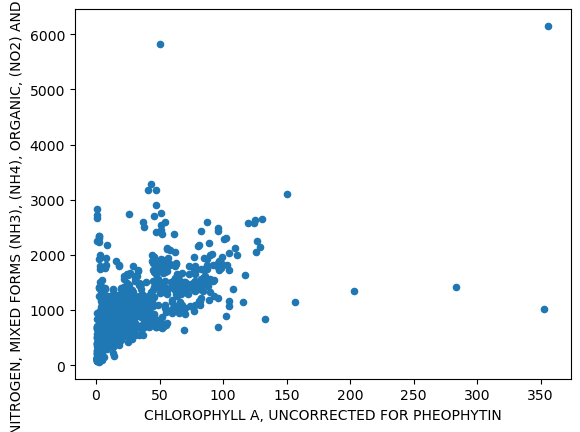

In [41]:
sdf = sdf.replace(np.nan,12345,regex=True)
sdf.head()
sdf.plot(kind = 'scatter', y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN')
plt.show()

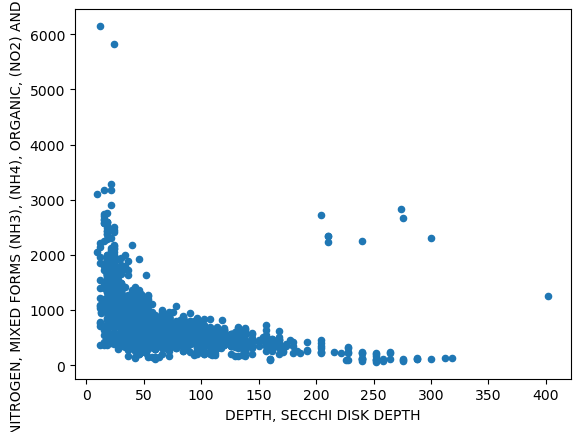

In [39]:
sdf.plot(kind = 'scatter', y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'DEPTH, SECCHI DISK DEPTH')
plt.show()

In [ ]:
sdf = sdf[sdf['NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)'].between(0, 3500)]
sdf = sdf[sdf['PHOSPHORUS'].between(0, 500)]
sdf = sdf[sdf['CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN'].between(0, 180)]
sdf = sdf[sdf['DEPTH, SECCHI DISK DEPTH'].between(0, 180)]

<Axes: xlabel='PHOSPHORUS', ylabel='NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)'>

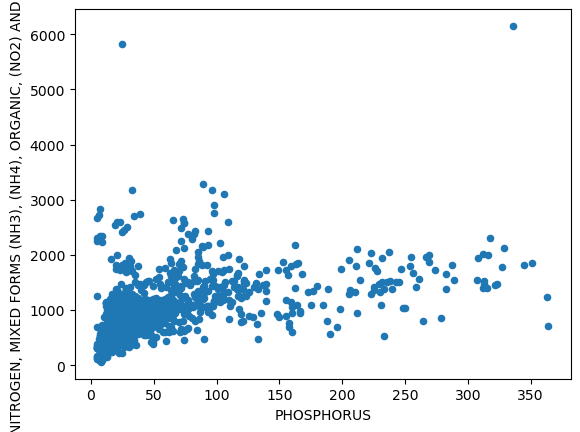

In [42]:
sdf.plot(kind = 'scatter', y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'PHOSPHORUS')

In [78]:
#Making train and test sets only from important features
X=sdf.loc[:,sdf.columns != 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)']     
X.info()
Y=sdf['NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)']  
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state = 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2010 entries, 6 to 17507
Data columns (total 3 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   PHOSPHORUS                                 2010 non-null   float64
 1   CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN  2010 non-null   float64
 2   DEPTH, SECCHI DISK DEPTH                   2010 non-null   float64
dtypes: float64(3)
memory usage: 62.8 KB


In [80]:
#Model Accuracy with only 3 most important features
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

model = RandomForestRegressor(random_state=True,warm_start=True,criterion='absolute_error',max_depth=100)


model.fit(X_train, Y_train)
train_accuracy = model.score(X_train, Y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test, Y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 92.84%
The accuracy for the test set is 66.02%


In [62]:
from sklearn.neighbors import KNeighborsRegressor


model = KNeighborsRegressor()


model.fit(X_train, Y_train)
train_accuracy = model.score(X_train, Y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test, Y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 69.85%
The accuracy for the test set is 60.99%


In [46]:

from sklearn.tree import DecisionTreeRegressor


model = DecisionTreeRegressor()


model.fit(X_train, Y_train)
train_accuracy = model.score(X_train, Y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test, Y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 98.67%
The accuracy for the test set is 47.73%


In [ ]:
from sklearn import svm


model = svm.SVR()
model.fit(X_train, Y_train)
train_accuracy = model.score(X_train, Y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test, Y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

Scaling Test and Train Sets

In [47]:
#Because we separated the input and output previously, if scale them separately
#it can cause inaccurate results. The code below addresses the issue
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
print(X_train_scaled.mean(axis=0))
print(X_test_scaled.mean(axis=0))

PHOSPHORUS                                   0.000000e+00
CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN   -8.101130e-17
DEPTH, SECCHI DISK DEPTH                    -5.007971e-17
dtype: float64
PHOSPHORUS                                  -0.032665
CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN   -0.060527
DEPTH, SECCHI DISK DEPTH                     0.017038
dtype: float64


In [48]:
#Model Accuracy with only 3 most important features
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

model = RandomForestRegressor(criterion='absolute_error')


model.fit(X_train_scaled, Y_train)
train_accuracy = model.score(X_train_scaled, Y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test_scaled, Y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 92.92%
The accuracy for the test set is 66.47%


Cross Validation

In [49]:
from sklearn.model_selection import KFold, ShuffleSplit, cross_val_score

clf = RandomForestRegressor()

k_folds = KFold(n_splits = 10)
cv = ShuffleSplit(n_splits=10,test_size=.2)

scores = cross_val_score(clf, X, Y, cv = cv)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.64765143 0.78341492 0.53711542 0.54123982 0.70904661 0.6610853
 0.66613254 0.6570626  0.59547888 0.70648396]
Average CV Score:  0.6504711481663706
Number of CV Scores used in Average:  10


Clustering